In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 수집

In [306]:
arirang_df = pd.read_csv('전처리 필요 데이터\Arirang_고배당_원본.csv', encoding='utf-8')
kodex_200_df = pd.read_csv('전처리 필요 데이터\KODEX_200_원본.csv', encoding='utf-8')
kodex_daq150_df = pd.read_csv('전처리 필요 데이터\KODEX_코스닥150_원본.csv', encoding='utf-8')
tiger_200it_df = pd.read_csv('전처리 필요 데이터\TIGER 200 IT_원본.csv', encoding='utf-8')

qqq_df = pd.read_csv('전처리 필요 데이터\QQQ_원본.csv', encoding='utf-8')
schd_df = pd.read_csv('전처리 필요 데이터\SCHD_원본.csv', encoding='utf-8')
spy_df = pd.read_csv('전처리 필요 데이터\SPY_원본.csv', encoding='utf-8')
vti_df = pd.read_csv('전처리 필요 데이터\VTI_원본.csv', encoding='utf-8')

# kor_cpi_df = pd.read_csv('전처리 필요 데이터\한국CPI_원본.csv', encoding='utf-8')
# usa_cpi_df = pd.read_excel('전처리 필요 데이터\미국CPI_원본.xlsx')

EXrate_df = pd.read_csv('전처리 필요 데이터\환율_원본.csv', encoding='utf-8')
basr_read_df = pd.read_csv('전처리 필요 데이터\채권_한국_5년물_10년물_원본.csv', encoding='utf-8')
usa_bond5_df = pd.read_csv('전처리 필요 데이터\채권_미국_5년물_원본.csv', encoding='utf-8')

In [307]:
etf_df = [arirang_df, kodex_200_df, kodex_daq150_df, tiger_200it_df, qqq_df, schd_df, spy_df, vti_df]
etf_names = ['arirang_df', 'kodex_200_df', 'kodex_daq150_df', 'tiger_200it_df', 'qqq_df', 'schd_df', 'spy_df', 'vti_df']

In [308]:
for name,df in zip(etf_names,etf_df):
    print(name+'\n')
    print(df.head(),'\n')

arirang_df

             날짜      종가      시가      고가      저가      거래량    변동 %
0  2024- 06- 21  14,610  14,550  14,635  14,440  960.21K   0.48%
1  2024- 06- 20  14,540  14,330  14,555  14,300  543.71K   1.47%
2  2024- 06- 19  14,330  14,285  14,370  14,195  919.86K   0.81%
3  2024- 06- 18  14,215  14,130  14,255  14,120  306.96K   0.64%
4  2024- 06- 17  14,125  14,150  14,225  14,075  244.39K  -0.11% 

kodex_200_df

             날짜      종가      시가      고가      저가    거래량    변동 %
0  2024- 06- 21  38,230  38,260  38,335  38,025  2.51M  -0.86%
1  2024- 06- 20  38,560  38,375  38,650  38,325  2.61M   0.39%
2  2024- 06- 19  38,410  38,195  38,430  38,160  3.26M   1.49%
3  2024- 06- 18  37,845  37,710  37,910  37,610  2.82M   1.05%
4  2024- 06- 17  37,450  37,470  37,635  37,365  5.37M  -0.54% 

kodex_daq150_df

          날짜      종가      시가      고가      저가    거래량    변동 %
0  2024.6.21  13,740  13,660  13,785  13,570  2.96M  -0.18%
1  2024.6.20  13,765  13,850  13,940  13,690  4.30M  -0.51%
2  20

In [310]:
for name,df in zip(etf_names,etf_df):
    print(name+'\n')
    print(df.info(),'\n')

arirang_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2777 entries, 0 to 2776
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      2777 non-null   object
 1   종가      2777 non-null   object
 2   시가      2777 non-null   object
 3   고가      2777 non-null   object
 4   저가      2777 non-null   object
 5   거래량     2765 non-null   object
 6   변동 %    2777 non-null   object
dtypes: object(7)
memory usage: 152.0+ KB
None 

kodex_200_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3005 entries, 0 to 3004
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      3005 non-null   object
 1   종가      3005 non-null   object
 2   시가      3005 non-null   object
 3   고가      3005 non-null   object
 4   저가      3005 non-null   object
 5   거래량     2782 non-null   object
 6   변동 %    3005 non-null   object
dtypes: object(7)
memory usage: 164.5+ KB
None 

kodex_daq150_df


# 전처리

In [311]:
# 값 사이 컴마 제거 후 정수로 자료형 변경
def preprocessing(series):
    if series.dtype == object:
        series = series.str.replace(',','').astype(float) 
    return series

# 값 사이 퍼센트 제거 후 정수로 실수형 변경
def remove_percent(series):
    return series.str.replace('%','').astype(float)

# # 거래량 K,M 정수로 변경후 곱하기
# def add_volumne(series):
#     series = series.str.replace('K','e3').str.replace('M','e6').astype(int)
#     return series


for df in etf_df:
    df['날짜'] = pd.to_datetime(df['날짜'])
    df['종가'] = preprocessing(df['종가'])
    df['변동 %'] = remove_percent(df['변동 %'])
    df.sort_values(by='날짜',inplace=True)
    print(df.info())
    print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 2777 entries, 2776 to 0
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      2777 non-null   datetime64[ns]
 1   종가      2777 non-null   float64       
 2   시가      2777 non-null   object        
 3   고가      2777 non-null   object        
 4   저가      2777 non-null   object        
 5   거래량     2765 non-null   object        
 6   변동 %    2777 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 173.6+ KB
None
             날짜       종가      시가      고가      저가    거래량  변동 %
2776 2013-03-26  11760.0  11,735  11,780  11,715  4.01K  0.34
2775 2013-03-27  11775.0  11,790  11,815  11,680  5.04K  0.13
2774 2013-03-28  11790.0  11,800  11,855  11,760  4.00K  0.13
2773 2013-03-29  11870.0  11,845  11,895  11,840  4.00K  0.68
2772 2013-04-01  11810.0  11,885  11,885  11,765  4.01K -0.51
<class 'pandas.core.frame.DataFrame'>
Index: 3005 ent

In [312]:
etf_df = [arirang_df, kodex_200_df, kodex_daq150_df, tiger_200it_df, qqq_df, schd_df, spy_df, vti_df]
etf_names = ['arirang_df', 'kodex_200_df', 'kodex_daq150_df', 'tiger_200it_df', 'qqq_df', 'schd_df', 'spy_df', 'vti_df']

In [313]:
select_list = [0,1,6]

arirang_graph = arirang_df.iloc[:, select_list]
kodex_200_graph = kodex_200_df.iloc[:, select_list]
kodex_daq150_graph = kodex_daq150_df.iloc[:, select_list]
tiger_200it_graph = tiger_200it_df.iloc[:, select_list]
qqq_graph = qqq_df.iloc[:, select_list]
schd_graph = schd_df.iloc[:, select_list]
spy_graph = spy_df.iloc[:, select_list]
vti_graph = vti_df.iloc[:, select_list]

In [314]:
graph_list = [arirang_graph, kodex_200_graph, kodex_daq150_graph, tiger_200it_graph, qqq_graph, schd_graph, spy_graph, vti_graph]

for df in graph_list:
    df.rename(columns={'변동 %':'일일 수익률'}, inplace=True)
    start = df.iloc[0]['종가']
    df['누적 수익률'] = np.log(df['종가'] / start)
    for i in range(230 * 5, len(df)):
        start_price = df.iloc[i - 230 * 5]['종가']  # 5년 전 종가
        end_price = df.iloc[i]['종가']  # 현재 종가
        df.at[df.index[i], '5년 수익률'] = np.log(end_price / start_price)  # 로그 수익률 계산 및 저장

C:\Users\귀여운 은순\AppData\Local\Temp\ipykernel_20116\1980004224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'변동 %':'일일 수익률'}, inplace=True)
C:\Users\귀여운 은순\AppData\Local\Temp\ipykernel_20116\1980004224.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['누적 수익률'] = np.log(df['종가'] / start)
C:\Users\귀여운 은순\AppData\Local\Temp\ipykernel_20116\1980004224.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

# 시각화

In [315]:
for names, graph in zip(etf_names,graph_list):
    print('\n',names,'\n')
    print(graph.tail())


 arirang_df 

          날짜       종가  일일 수익률    누적 수익률    5년 수익률
4 2024-06-17  14125.0   -0.11  0.183242  0.209957
3 2024-06-18  14215.0    0.64  0.189594  0.218494
2 2024-06-19  14330.0    0.81  0.197651  0.212644
1 2024-06-20  14540.0    1.47  0.212200  0.219882
0 2024-06-21  14610.0    0.48  0.217002  0.231995

 kodex_200_df 

          날짜       종가  일일 수익률    누적 수익률    5년 수익률
4 2024-06-17  37450.0   -0.54  0.358202  0.389242
3 2024-06-18  37845.0    1.05  0.368694  0.399734
2 2024-06-19  38410.0    1.49  0.383513  0.408072
1 2024-06-20  38560.0    0.39  0.387411  0.386456
0 2024-06-21  38230.0   -0.86  0.378816  0.375574

 kodex_daq150_df 

          날짜       종가  일일 수익률    누적 수익률    5년 수익률
4 2024-06-17  13805.0   -0.11  0.244559  0.534402
3 2024-06-18  13815.0    0.07  0.245283  0.495739
2 2024-06-19  13835.0    0.14  0.246730  0.565415
1 2024-06-20  13765.0   -0.51  0.241658  0.645274
0 2024-06-21  13740.0   -0.18  0.239840  0.559798

 tiger_200it_df 

          날짜       종가  일일 수익률

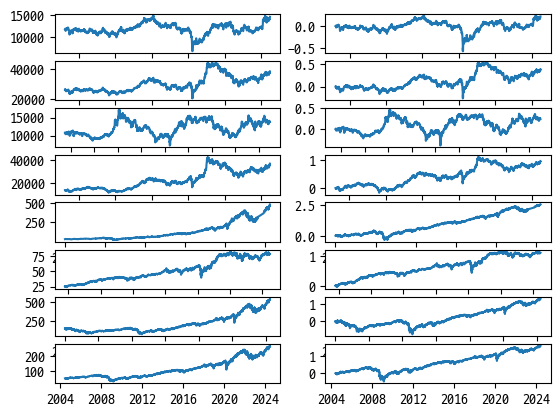

<Figure size 1500x1500 with 0 Axes>

In [316]:
fig,axs = plt.subplots(8,2)

plt.figure(figsize=(15,15))

for i,graph in zip(range(8), graph_list):
    axs[i][0].plot(graph['날짜'],graph['종가'])
    axs[i][1].plot(graph['날짜'], graph['누적 수익률'])
plt.show()

In [317]:
from scipy.stats import gmean

graph_list = [arirang_graph, kodex_200_graph, kodex_daq150_graph, tiger_200it_graph, qqq_graph, schd_graph, spy_graph, vti_graph]

# 각 ETF에 대해 평균 수익률과 변동성 계산
for graph in graph_list:
    y5_returns = np.array(graph['5년 수익률'])
    culm_returns = np.array(graph['누적 수익률'])
    daily_returns = np.array(graph['일일 수익률'])
    
    # NaN 값을 제외하고 계산
    y5_returns = y5_returns[~np.isnan(y5_returns)]
    culm_returns = culm_returns[~np.isnan(culm_returns)]
    daily_returns = daily_returns[~np.isnan(daily_returns)]

    y5_mean = gmean(y5_returns + 1) - 1  # 5년 수익률에 1을 더해 음수 값 문제를 피하고, 다시 1을 빼줌
    culm_mean = gmean(culm_returns + 1) - 1
    daily_mean = gmean(daily_returns + 1) - 1
    y5_volatility = np.std(y5_returns, ddof=1)
    culm_volatility = np.std(culm_returns, ddof=1)
    daily_volatility = np.std(daily_returns, ddof = 1)

    
    # 평균 수익률과 변동성을 새로운 열로 추가 (SettingWithCopyWarning을 피하기 위해 .loc 사용)
    graph.loc[:, '5년 평균 수익률'] = y5_mean
    graph.loc[:, '누적 평균 수익률'] = culm_mean
    graph.loc[:, '평균 수익률'] = daily_mean
    graph.loc[:, '5년 변동성'] = y5_volatility
    graph.loc[:, '누적 변동성'] = culm_volatility
    graph.loc[:, '일일 변동성'] = daily_volatility

# 결과 확인을 위해 마지막 몇 행 출력
for graph in graph_list:
    print(graph.tail())

          날짜       종가  일일 수익률    누적 수익률    5년 수익률  5년 평균 수익률  누적 평균 수익률  \
4 2024-06-17  14125.0   -0.11  0.183242  0.209957  -0.016707  -0.009769   
3 2024-06-18  14215.0    0.64  0.189594  0.218494  -0.016707  -0.009769   
2 2024-06-19  14330.0    0.81  0.197651  0.212644  -0.016707  -0.009769   
1 2024-06-20  14540.0    1.47  0.212200  0.219882  -0.016707  -0.009769   
0 2024-06-21  14610.0    0.48  0.217002  0.231995  -0.016707  -0.009769   

   평균 수익률   5년 변동성   누적 변동성    일일 변동성  
4     NaN  0.13121  0.10858  1.077881  
3     NaN  0.13121  0.10858  1.077881  
2     NaN  0.13121  0.10858  1.077881  
1     NaN  0.13121  0.10858  1.077881  
0     NaN  0.13121  0.10858  1.077881  
          날짜       종가  일일 수익률    누적 수익률    5년 수익률  5년 평균 수익률  누적 평균 수익률  \
4 2024-06-17  37450.0   -0.54  0.358202  0.389242   0.182973   0.119376   
3 2024-06-18  37845.0    1.05  0.368694  0.399734   0.182973   0.119376   
2 2024-06-19  38410.0    1.49  0.383513  0.408072   0.182973   0.119376   
1 2024-06

c:\Python310\lib\site-packages\scipy\stats\_stats_py.py:197: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)
C:\Users\귀여운 은순\AppData\Local\Temp\ipykernel_20116\3471358110.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph.loc[:, '5년 평균 수익률'] = y5_mean
c:\Python310\lib\site-packages\scipy\stats\_stats_py.py:197: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)
C:\Users\귀여운 은순\AppData\Local\Temp\ipykernel_20116\3471358110.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [286]:
indexes = [f"{i}:{10-i}" for i in range(1,10)]
cols = ['return', 'var']

arirang_kodex200 = pd.DataFrame(columns=cols)
arirang_kodex_daq150 = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)
spy_vs_arirang = pd.DataFrame(columns=cols)




In [287]:
for i in range(1,10):
    vs_return = (spy_graph['평균 수익률'].iloc[0]*i+arirang_graph['평균 수익률'].iloc[0]*(10-i))/10
    vs_std = (spy_graph['변동성'].iloc[0]*i+arirang_graph['변동성'].iloc[0]*(10-i))/10
    spy_vs_arirang.loc[i-1] = (vs_return, vs_std)

KeyError: '변동성'

In [ ]:
# import pandas as pd

# # Load the CSV files for QQQ data
# file_path_prices_qqq = '/mnt/data/QQQ의 주가 수익률 및 수익률의 표준편차(변동성).csv'
# file_path_dividends_qqq = '/mnt/data/QQQ.csv'

# # Read both files
# data_prices_qqq = pd.read_csv(file_path_prices_qqq, encoding='cp949')
# data_dividends_qqq = pd.read_csv(file_path_dividends_qqq)

# # Trim any whitespace from the column names
# data_prices_qqq.columns = data_prices_qqq.columns.str.strip()

# # Convert date columns to datetime
# data_prices_qqq['날짜'] = pd.to_datetime(data_prices_qqq['날짜'].str.strip())
# data_dividends_qqq['Date'] = pd.to_datetime(data_dividends_qqq['Date'])

# # Sort data by date
# data_prices_qqq = data_prices_qqq.sort_values(by='날짜')
# data_dividends_qqq = data_dividends_qqq.sort_values(by='Date')

# # Extract the beginning and ending values
# beginning_value = data_prices_qqq['종가'].iloc[0]
# ending_value = data_prices_qqq['종가'].iloc[-1]

# # Calculate the total dividends received during the period
# total_dividends = data_dividends_qqq['Dividends'].sum()

# # Calculate the ending value including dividends
# ending_value_with_dividends = ending_value + total_dividends

# # Calculate the number of years
# days = (data_prices_qqq['날짜'].iloc[-1] - data_prices_qqq['날짜'].iloc[0]).days
# years = days / 365.25  # considering leap years

# # Calculate CAGR
# CAGR = ((ending_value_with_dividends / beginning_value) ** (1 / years)) - 1
# CAGR_percentage = CAGR * 100

# # Display the calculated CAGR
# CAGR_percentage


In [ ]:
for df,name in zip(graph_list,etf_names):
    df.round(2).to_csv(f"시각화용 데이터/{name}.csv", float_format='%.4f')